In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [20]:
P = 2
N = 2

In [21]:
x = torch.randint(0,10,(2, 3,8,8))

In [22]:
print(x)

tensor([[[[9, 2, 8, 9, 6, 3, 6, 6],
          [8, 9, 0, 1, 4, 8, 2, 1],
          [9, 0, 4, 1, 5, 1, 0, 6],
          [6, 4, 7, 2, 8, 7, 4, 3],
          [8, 3, 9, 7, 6, 2, 6, 3],
          [1, 9, 3, 0, 8, 6, 3, 0],
          [4, 2, 1, 2, 4, 2, 5, 2],
          [4, 5, 8, 9, 0, 7, 3, 9]],

         [[5, 4, 2, 9, 8, 1, 5, 4],
          [1, 6, 2, 8, 0, 8, 4, 0],
          [8, 4, 0, 4, 7, 2, 4, 9],
          [5, 2, 2, 9, 2, 6, 2, 4],
          [7, 2, 7, 6, 5, 3, 5, 6],
          [3, 6, 1, 4, 3, 0, 2, 0],
          [1, 6, 3, 2, 9, 2, 9, 6],
          [7, 6, 7, 9, 4, 7, 8, 4]],

         [[9, 0, 6, 4, 7, 1, 1, 2],
          [5, 4, 2, 2, 1, 5, 5, 7],
          [1, 9, 9, 0, 8, 9, 6, 8],
          [7, 0, 3, 6, 3, 9, 3, 6],
          [1, 1, 4, 6, 8, 7, 8, 2],
          [2, 1, 3, 9, 0, 6, 6, 9],
          [5, 9, 1, 5, 4, 4, 1, 6],
          [0, 7, 8, 8, 4, 5, 7, 4]]],


        [[[2, 3, 2, 3, 3, 1, 8, 1],
          [7, 9, 9, 6, 6, 3, 2, 9],
          [5, 2, 3, 4, 8, 0, 5, 8],
          [0, 6, 1, 

In [25]:

x = x.view(N,3,P*P,-1)
x = x.view(N,P*P,-1)
print(x.shape)

torch.Size([2, 4, 48])


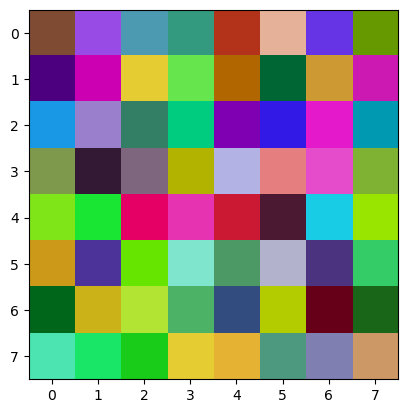

torch.Size([2, 16, 12])


In [37]:
#generate a picture as torch tensor
x = torch.randint(0,10,(2, 3,8,8))
#visualize the picture in colors with matplot
import matplotlib.pyplot as plt
# rescale the values
x = x/10
plt.imshow(x[0].permute(1,2,0))
plt.show()
y = image_to_patches(x,2)
y = y.flatten(2)
print(y.shape)



In [30]:
def image_to_patches(input_image, patch_size):
    N, C, H, W = input_image.shape
    P = patch_size
    assert H % P == 0 and W % P == 0, "Image dimensions should be divisible by patch size."

    patches = input_image.unfold(2, P, P).unfold(3, P, P)
    patches = patches.contiguous().view(N, C, -1, P, P)
    patches = patches.permute(0, 2, 1, 3, 4).contiguous()

    return patches